# <font color='Purple'>**Monthly Sunspots Prediction using SimpleRNN**</font>


## <font color='green'>**Table of Contents**</font>
>[Monthly Sunspots Prediction using SimpleRNN](#scrollTo=vp8WoBLHNC8w)

>>[1. Dataset Information](#scrollTo=HFsotPcgdHii)

>>[2. Import the Required Libraries & Modules](#scrollTo=ZwUbH7LWdKKv)

>>[3. Load the Monthly Sunspot dataset](#scrollTo=Gl38CKbdO5TU)

>>[4. Time Series Visualization](#scrollTo=nxXlB8AgR8af)

>>[5. Data Preprocessing](#scrollTo=7mvSo65USHm5)

>>>[5.1 Scaling and Splitting Data into Train & Test set](#scrollTo=EmOgUQLRdp0W)

>>>>[Define a format_data function for Scaling and Splitting Data](#scrollTo=q32TWU0USpM2)

>>>[5.2 Create Independent & Dependent Variables](#scrollTo=rvBa4oijUMha)

>>>>[Define a findXY function to create independent & dependent variables](#scrollTo=VNlRSi_jVBTp)

>>[6. Model Development & Evaluation](#scrollTo=aKBD97MGSv6S)

>>>>[Define a RNN function to build RNN model](#scrollTo=ZZOqfnLpVRRZ)

>>[7. Model Prediction](#scrollTo=hfKrVIZFZTcV)



## <font color='green'>**1. Dataset Information**</font>
Sunspots are temporary phenomena on the Sun's photosphere that appear as spots darker than the surrounding areas. They are regions of reduced surface temperature caused by concentrations of magnetic field flux that inhibit convection. Sunspots usually appear in pairs of opposite magnetic polarity. Their number varies according to the approximately 11-year solar cycle.

Source: https://en.wikipedia.org/wiki/Sunspot

Content :
Monthly Mean Total Sunspot Number, from 1749/01/01 to 2017/08/31

## <font color='green'>**2. Import the Required Libraries & Modules**</font>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## <font color='green'>**3. Load the Monthly Sunspot dataset**</font>

In [26]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
df = pd.read_csv(url)
df

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


## <font color='green'>**4. Time Series Visualization**</font>

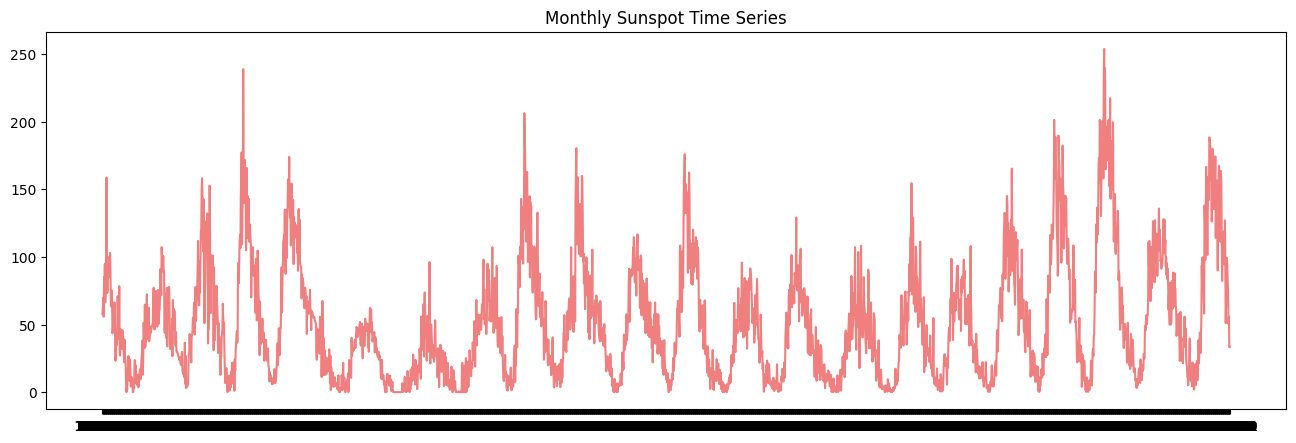

In [27]:
plt.figure(figsize=(16,5), dpi = 100)
plt.plot(df.Month, df.Sunspots, color='lightcoral')
plt.title('Monthly Sunspot Time Series')
plt.show();

## <font color='green'>**5. Data Preprocessing**</font>

### <font color='orange'>**5.1 Scaling and Splitting Data into Train & Test set**</font>

In [28]:
data = np.array(df[['Sunspots']])
data

array([[58. ],
       [62.6],
       [70. ],
       ...,
       [55.8],
       [33.3],
       [33.4]])

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
n = len(df)
# split
split_percent=0.8
split = int(n*split_percent)
train_data = data[range(split)]
test_data = data[split:]

#### <font color='magenta'>**Define a format_data function for Scaling and Splitting Data**</font>

In [30]:
def format_data(url, split_percent=0.8):
    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # split
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

In [31]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = format_data(sunspots_url)

### <font color='orange'>**5.2 Create Independent & Dependent Variables**</font>

In [32]:
time_steps=10
y_train_ind = np.arange(time_steps, len(train_data), time_steps)
y_train = train_data[y_train_ind]
rows_xtrain = len(y_train)
X_train = train_data[range(time_steps*rows_xtrain)]
X_train = np.reshape(X_train, (rows_xtrain, time_steps, 1))

In [33]:
y_test_ind = np.arange(time_steps, len(test_data), time_steps)
y_test = test_data[y_test_ind]
rows_xtest = len(y_test)
X_test = test_data[range(time_steps*rows_xtest)]
X_test = np.reshape(X_test, (rows_xtest, time_steps, 1))

#### <font color='magenta'>**Define a findXY function to create independent & dependent variables**</font>

In [34]:
def findXY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

In [35]:
time_steps=10
X_train, y_train=  findXY(train_data, time_steps)

In [36]:
X_test, y_test= findXY(test_data, time_steps)

## <font color='green'>**6. Model Development & Evaluation**</font>

In [37]:
hidden_unit=3
dense_unit=1
input_shape=(time_steps,1)
activation=['tanh']
model= Sequential()
model.add(SimpleRNN(hidden_unit, input_shape= input_shape, activation= activation[0]))
model.add(Dense(units= dense_unit, activation= activation[0]))
model.compile(loss='mean_squared_error', optimizer='adam')

#### <font color='magenta'>**Define a RNN function to build RNN model**</font>

In [38]:
def RNN(hidden_unit, dense_unit, input_shape, activation):
  # 1. Define Model
  model= Sequential()
  model.add(SimpleRNN(hidden_unit, input_shape= input_shape, activation= activation[0]))
  model.add(Dense(units= dense_unit, activation= activation[0]))
  # 2. Compile Model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [39]:
model= RNN(hidden_unit=3, dense_unit=1, input_shape=(time_steps,1), activation=['tanh'])

In [40]:
# 3. Fit Model
history = model.fit(X_train,y_train, epochs=20, verbose=2, batch_size=1)
# 4. Evaluate Model
#loss, acc = model.evaluate(X_test, y_test)

Epoch 1/20
225/225 - 1s - loss: 0.0599 - 1s/epoch - 5ms/step
Epoch 2/20
225/225 - 0s - loss: 0.0160 - 438ms/epoch - 2ms/step
Epoch 3/20
225/225 - 0s - loss: 0.0097 - 459ms/epoch - 2ms/step
Epoch 4/20
225/225 - 0s - loss: 0.0076 - 411ms/epoch - 2ms/step
Epoch 5/20
225/225 - 0s - loss: 0.0063 - 434ms/epoch - 2ms/step
Epoch 6/20
225/225 - 0s - loss: 0.0055 - 430ms/epoch - 2ms/step
Epoch 7/20
225/225 - 0s - loss: 0.0052 - 422ms/epoch - 2ms/step
Epoch 8/20
225/225 - 0s - loss: 0.0049 - 421ms/epoch - 2ms/step
Epoch 9/20
225/225 - 0s - loss: 0.0046 - 407ms/epoch - 2ms/step
Epoch 10/20
225/225 - 0s - loss: 0.0044 - 433ms/epoch - 2ms/step
Epoch 11/20
225/225 - 0s - loss: 0.0042 - 416ms/epoch - 2ms/step
Epoch 12/20
225/225 - 0s - loss: 0.0041 - 426ms/epoch - 2ms/step
Epoch 13/20
225/225 - 0s - loss: 0.0040 - 432ms/epoch - 2ms/step
Epoch 14/20
225/225 - 0s - loss: 0.0039 - 405ms/epoch - 2ms/step
Epoch 15/20
225/225 - 0s - loss: 0.0039 - 430ms/epoch - 2ms/step
Epoch 16/20
225/225 - 0s - loss: 0.00

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


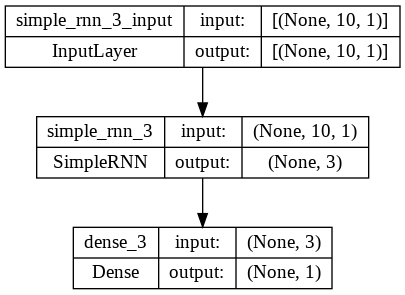

In [42]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

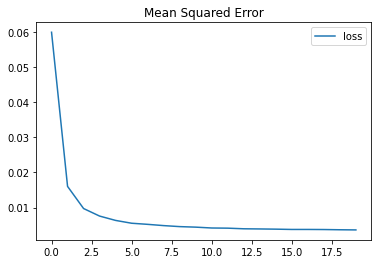

In [43]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Mean Squared Error");

## <font color='green'>**7. Model Prediction**</font>

In [44]:
train_predict= model.predict(X_train)

test_predict= model.predict(X_test)

2/2 [==============================] - 0s 6ms/step


In [45]:
def print_error(y_train, y_test, train_predict, test_predict):
  train_rmse= math.sqrt(mean_squared_error(y_train, train_predict))

  test_rmse= math.sqrt(mean_squared_error(y_test, test_predict))

  print('Train RMSE : ', train_rmse)
  print('Test RMSE :', test_rmse)

In [46]:
print_error(y_train, y_test, train_predict, test_predict)

Train RMSE :  0.059297892419784
Test RMSE : 0.08674382564637029


In [47]:
def model_prediction(y, ypred, model_name): 
       
    # Model Evaluation metrics
    print("\n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('\n')
    
    # Actual vs Predicted Scatter Plot
    f, ax = plt.subplots(figsize=(15,8),dpi=50);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel('Monthly Sunspot Values')
    plt.ylabel('Predicted Monthly Sunspot Values')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
      
    # Actual vs Predicted Plot
    print('\n')
    fig,ax=plt.subplots(figsize=(15,8), dpi=50)
    plt.plot(y, label='Actual values', color = 'blue')
    plt.plot(ypred, label='Predicted values', color = 'red')
    plt.legend(loc='best')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show();


 Model Evaluation Report: 
Mean Absolute Error(MAE) of Simple_RNN : 0.043329433
Mean Squared Error(MSE) of Simple_RNN : 0.00351624
Root Mean Squared Error (RMSE) of Simple_RNN : 0.059297893






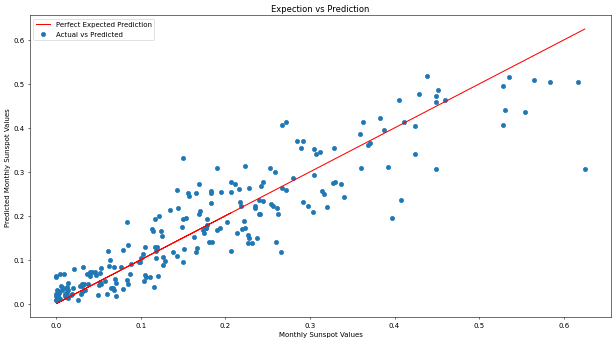

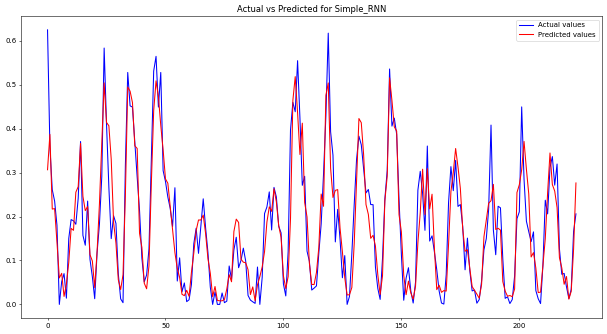

In [48]:
model_prediction(y_train, train_predict, 'Simple_RNN')